In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data=sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.shape


(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: xlabel='species', ylabel='count'>

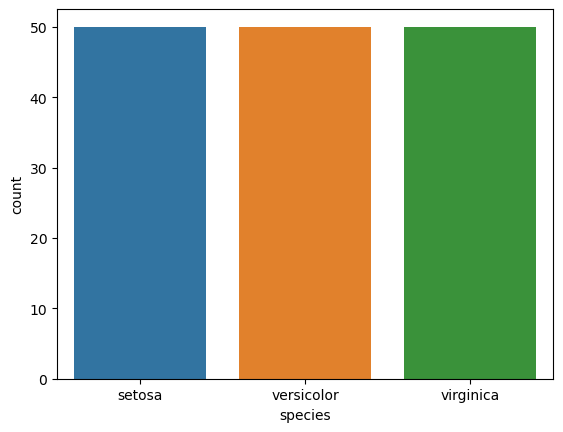

In [6]:
sns.countplot(data=data,x=data["species"])

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

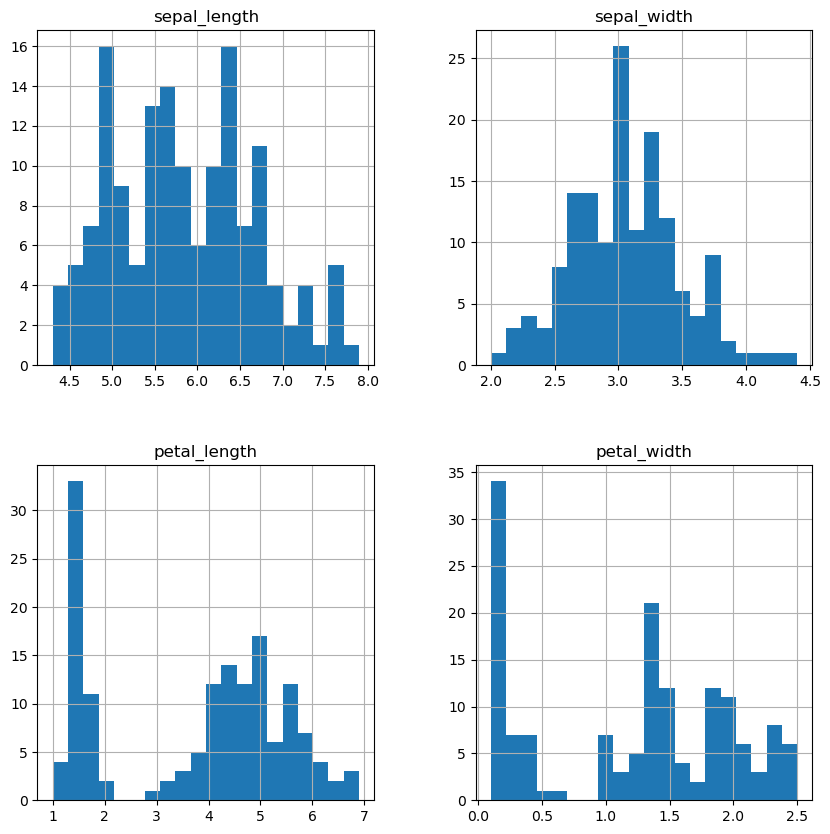

In [7]:
data.hist(bins=20,figsize=(10,10))

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['species']=encoder.fit_transform(data['species'])

<Axes: >

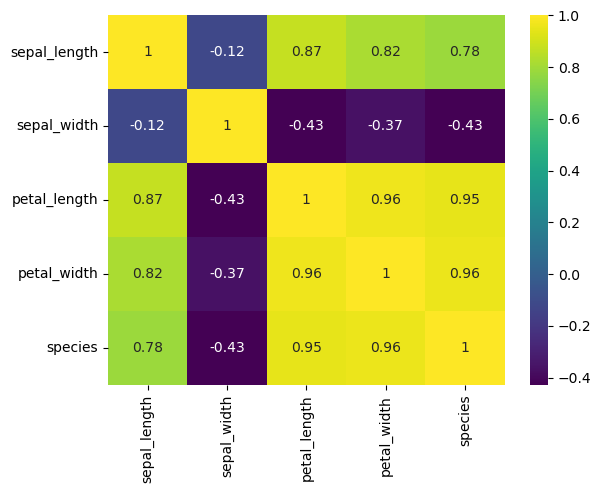

In [9]:
sns.heatmap(data.corr(),annot=True,cmap='viridis')

In [11]:
from sklearn.model_selection import train_test_split
X=data.drop(['species'],axis=1)
Y=data['species']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt_model=dt.fit(X_train,Y_train)
y_pred=dt.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.86      0.92         7
           2       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.92      0.95      0.93        15
weighted avg       0.95      0.93      0.94        15



In [14]:
y_train_pred=dt.predict(X_train)
train_accuracy=accuracy_score(Y_train,y_train_pred)
print(train_accuracy)

1.0


In [15]:
y_test_pred=dt.predict(X_test)
test_accuracy=accuracy_score(Y_test,y_test_pred)
print(test_accuracy)

0.9333333333333333


[Text(0.4, 0.9, 'x[2] <= 2.45\ngini = 0.666\nsamples = 135\nvalue = [45, 43, 47]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 45\nvalue = [45, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.499\nsamples = 90\nvalue = [0, 43, 47]'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.159\nsamples = 46\nvalue = [0, 42, 4]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[2] <= 5.05\ngini = 0.044\nsamples = 44\nvalue = [0, 1, 43]'),
 Text(0.7, 0.3, 'x[0] <= 6.5\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]')]

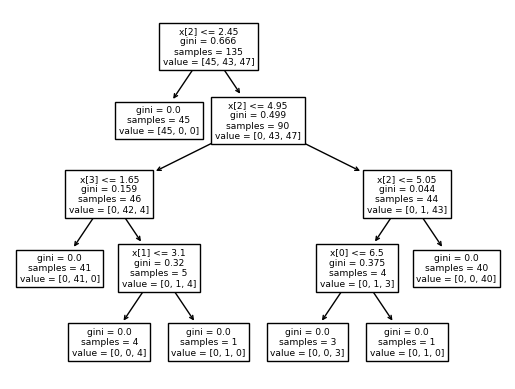

In [16]:
from sklearn import tree
tree.plot_tree(dt)

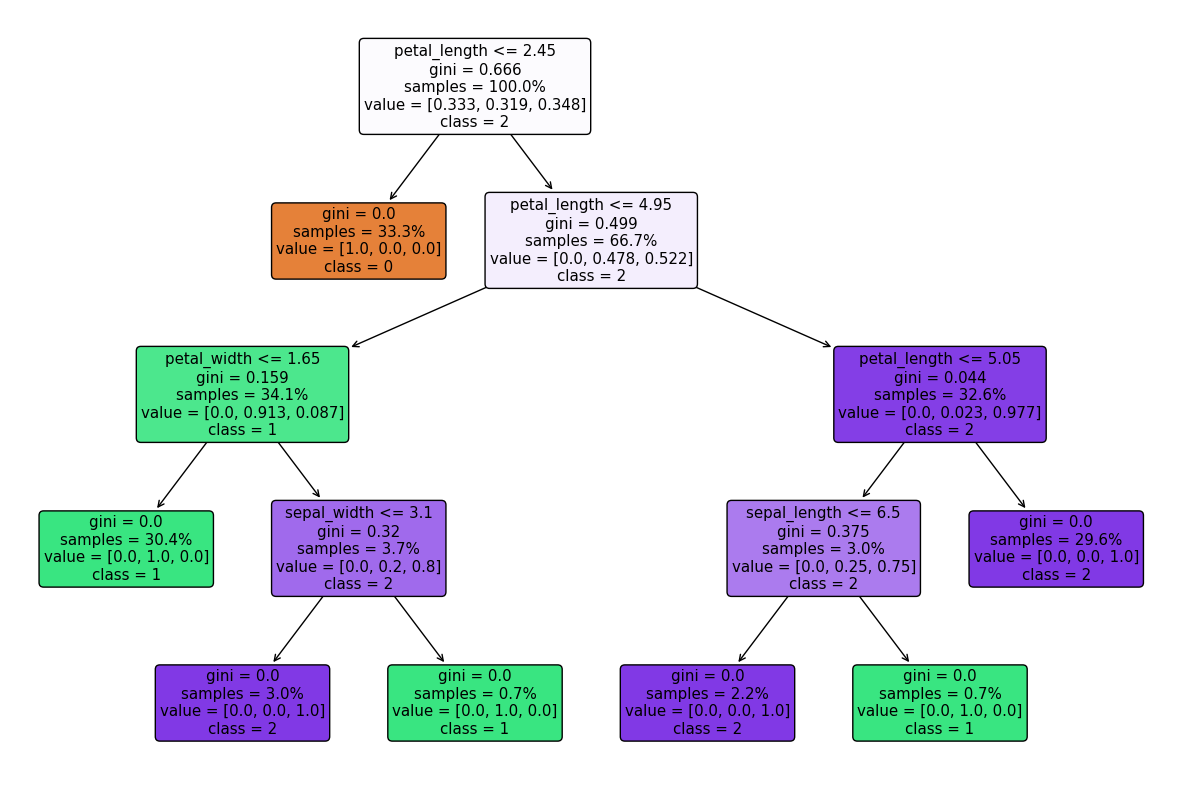

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming dt is your DecisionTreeClassifier object, data is your feature matrix, and Y is your target variable

class_names = Y.unique().astype(str)
feature_names = list(data.columns)

# Convert class names to a dictionary for mapping
class_mapping = {str(i): class_name for i, class_name in enumerate(class_names)}

# Map target variable Y to strings
y_as_strings = Y.map(class_mapping)

plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, proportion=True)
plt.show()
